
Обязательная часть

Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

    построить не менее 4 визуализаций различных видов;
    каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
    по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

    данные приложений из Google Play;
    данные о видео из трендов YouTube;
    данные об уровне счастья в разных странах;
    данные по фильмам и сериалам Netflix.



In [153]:
import pandas as pd
import matplotlib.pyplot as plt

In [161]:
netflix = pd.read_csv(
    'netflix_titles.csv')

In [162]:
netflix_film = netflix[netflix['type']=='Movie']
netflix_series = netflix[netflix['type']=='TV Show']
filmsByYear = netflix_film.groupby('release_year')['release_year'].count()
seriesByYear = netflix_series.groupby('release_year')['release_year'].count()
netflix_film

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
...,...,...,...,...,...,...,...,...,...,...,...,...
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,NaN,United States,"April 1, 2016",2007,TV-MA,70 min,Documentaries,Frank was a rising pop star when he married Ci...
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102 min,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88 min,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...
5580,80064521,Movie,Jeremy Scott: The People's Designer,Vlad Yudin,Jeremy Scott,United States,"April 1, 2016",2015,PG-13,109 min,Documentaries,The journey of fashion designer Jeremy Scott f...


In [4]:
filmsByYear_df = pd.DataFrame(filmsByYear)
filmsByYear_df.rename(columns = {'release_year':'Movie'}, inplace=True) 
seriesByYear_df = pd.DataFrame(seriesByYear)
seriesByYear_df.rename(columns = {'release_year':'TV Show'}, inplace=True) 
netflixByYear_join = filmsByYear_df.merge(seriesByYear_df, how='outer', on='release_year').sort_index().fillna(0)
netflixByYear_join

,Movie,TV Show
release_year,,
1925,0.0,1.0
1942,2.0,0.0
1943,3.0,0.0
1944,3.0,0.0
1945,3.0,0.0
...,...,...
2016,593.0,237.0
2017,682.0,277.0
2018,646.0,417.0


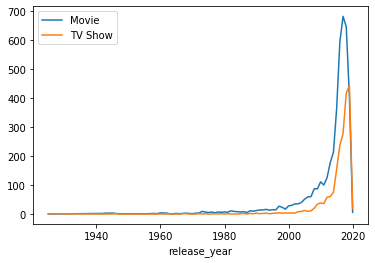

In [5]:
netflixByYear_join.plot()

Принято считать, что Netflix скорее ориентируется на сериалы, чем на фильмы, однако это не так. Мы видим, что стриминговый сервис загружает больше фильмов, чем сериалов (четкое преобладание фильмов впоследние годы оюбъясняется, скорее всего, тем, что Netflix больше всего ориентируется на новинки кино- и сериального проката, старые фильмы и сериалы на сайте почти не представлены). Преобладание фильмов может объясняться как большей частотой их выхода, так и тем, что файлы с фильмами элементарно меньше весят и меньше занимают места. Большая частота выхода, в свою очередь, может быть связана с относительной дешевизной их производства по сравнению с сериалами. Общеизвестно, что сам Netflix снимает дорогие и продолжительные сериалы с голливудскими звездами, но за то же время выпускает с десяток непритязательных мелодрам для подростков с начинающими актёрами.

In [76]:
netflix1 = netflix.groupby('country')[['country']].count().rename(columns={'country':'quantity1'}).sort_values('quantity1', ascending=False)
netflix1.reset_index(inplace=True)

In [77]:
[x for x in netflix1.country if ',' not in x]

['United States',
 'India',
 'United Kingdom',
 'Japan',
 'Canada',
 'South Korea',
 'Spain',
 'France',
 'Mexico',
 'Turkey',
 'Australia',
 'Taiwan',
 'Hong Kong',
 'Thailand',
 'China',
 'Egypt',
 'Brazil',
 'Philippines',
 'Indonesia',
 'Germany',
 'Argentina',
 'Nigeria',
 'Colombia',
 'Italy',
 'Pakistan',
 'Malaysia',
 'Singapore',
 'Russia',
 'Israel',
 'Denmark',
 'Chile',
 'Netherlands',
 'Poland',
 'Ireland',
 'New Zealand',
 'Norway',
 'Sweden',
 'Belgium',
 'Lebanon',
 'South Africa',
 'Romania',
 'Peru',
 'Vietnam',
 'United Arab Emirates',
 'Iceland',
 'Austria',
 'Uruguay',
 'Hungary',
 'Switzerland',
 'Ukraine',
 'Bangladesh',
 'Bulgaria',
 'Cambodia',
 'Venezuela',
 'Guatemala',
 'Ghana',
 'Dominican Republic',
 'Finland',
 'Georgia',
 'Saudi Arabia',
 'Croatia',
 'West Germany']

In [90]:
netflix1 = netflix1[netflix1.country.isin([x for x in netflix1.country if ',' not in x])]
netflix1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 553
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    62 non-null     object
 1   quantity1  62 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [135]:
data = pd.DataFrame({'country':'Others', 'quantity1':[netflix1[netflix1.quantity1 < 100]['quantity1'].sum()]})
netflixjoined = pd.concat([netflix1[netflix1.quantity1 > 100], data])
netflixjoined.set_index('country', inplace=True)
netflixjoined.sort_values(by='quantity1', ascending=False, inplace=True)

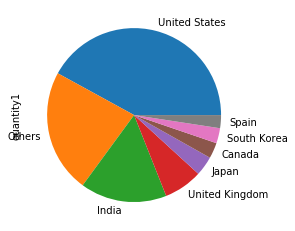

In [136]:
netflixjoined.plot(kind='pie', y='quantity1', legend=False)

Как и ожидалось, лидер по производству фильмов и сериалов для Netflix - США. Это может объясняться и тем, что стриминговый сервис - американский и был рассчитан в первую очередь на американцев, так и тем, что США действительно производят в большом количестве фильмы и сериалы, популярные не только на родине, но и по всему миру. Следом идет категория Others, в которую были включены все страны, фильмов и сериалов чьего производства на Netflix не больше 100. Количество таких фильмов составляет около половины всех, снятых в США, и показывает, что Netflix старается представить на своем сайте как можно больше фильмов из разных стран. На третьем месте Индия, у фильмов которой тоже множество поклонников по всему миру и налаженное кинопроизводство ("Болливуд"). Не будем забывать, что Индия - вторая страна по численности населения. При этом, например, Китай, который по этому параметру должен бы быть по крайне мере в топ-8, в эту подборку не попал вообще: видимо, Netflix отдает предпочтение другим азиатским странам - Японии и Южной Корее. Мы могли бы предположить, что сразу же после США будут следовать фильмы из европейских стран, поскольку европейская культура и кинематограф близки к американским, однако на графике они представлены только Великобританией и Испанией. Как ни парадоксально, это может объясняться той же близостью культур: европейцам не очень интересна кинопродукция собственного производства, гораздо больше их манит Голливуд (где снимают и снимаются наиболее успешные европейские режиссеры и актеры). 

In [163]:
def deletemin(minute):
    minute = int(minute[:-4])
    return minute

netflix_film['duration'] = netflix_film['duration'].apply(deletemin)
netflix_film

C:\Pyth\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
...,...,...,...,...,...,...,...,...,...,...,...,...
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,NaN,United States,"April 1, 2016",2007,TV-MA,70,Documentaries,Frank was a rising pop star when he married Ci...
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...
5580,80064521,Movie,Jeremy Scott: The People's Designer,Vlad Yudin,Jeremy Scott,United States,"April 1, 2016",2015,PG-13,109,Documentaries,The journey of fashion designer Jeremy Scott f...


In [178]:
netflix_dur = netflix_film[netflix_film['release_year'].isin([1942, 2020])]
netflix_dur = netflix_dur.groupby('release_year')[['duration']].mean()

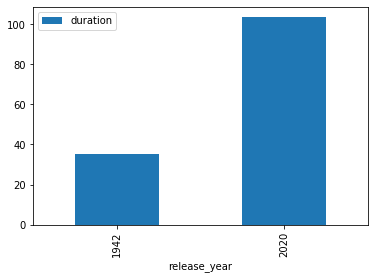

In [179]:
netflix_dur.plot(kind='bar')

Из этого графика мы видим, что средняя продолжительность фильмов за 78 лет выросла больше чем в два раза.

In [293]:
netflix_desc = netflix[['release_year', 'description']]
netflix_desc['description'] = netflix_desc['description'].apply(lambda x : x.split())
netflix_desc

C:\Pyth\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,release_year,description
0,2019,"[Before, planning, an, awesome, wedding, for, ..."
1,2016,"[Jandino, Asporaat, riffs, on, the, challenges..."
2,2013,"[With, the, help, of, three, human, allies,, t..."
3,2016,"[When, a, prison, ship, crash, unleashes, hund..."
4,2017,"[When, nerdy, high, schooler, Dani, finally, a..."
...,...,...
6229,2015,"[This, parody, of, first-person, shooter, game..."
6230,2016,"[Marc, Maron, stars, as, Marc, Maron,, who, in..."
6231,2016,"[Nursery, rhymes, and, original, music, for, c..."
6232,2013,"[Set, during, the, Russian, Revolution,, this,..."


In [294]:
def sex_count(net):
    a = 0
    b = 0
    m = ['man', 'boy', 'his', 'him', 'male', 'he']
    w = ['woman', 'girl', 'her', 'female', 'she']
    for n in m:
        if n in net:
            a = 1
    for n in w:
        if n in net:
            b = 1
    if a == 1 and b == 0:
        return 'man'
    elif a == 0 and b == 1:
        return 'woman'
    return None
        

In [295]:
netflix_desc['sex'] = netflix_desc['description'].apply(sex_count)

C:\Pyth\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [296]:
netflix_desc.dropna(inplace=True)
netflix_sex = netflix_desc[['release_year', 'sex']]

C:\Pyth\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [299]:
pivot_netflix = pd.pivot_table(netflix_sex, index=['release_year'], columns=['sex'], aggfunc='size')

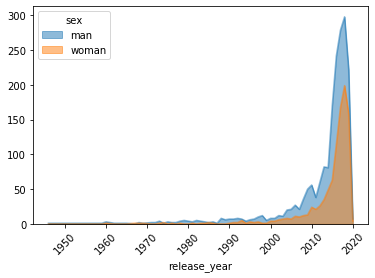

In [301]:
pivot_netflix.plot(kind='area', rot=45, stacked=False)

In [302]:
#другой вариант решения той же задачи без сводной таблицы.
netflix_man = netflix_sex[netflix_sex['sex']=='man']
netflix_woman = netflix_sex[netflix_sex['sex']=='woman']
manByYear = netflix_man.groupby('release_year')['release_year'].count()
womanByYear = netflix_woman.groupby('release_year')['release_year'].count()
manByYear

release_year
1946      1
1959      1
1960      3
1962      1
1965      1
1968      2
1969      1
1971      2
1972      2
1973      4
1974      1
1975      3
1976      2
1977      2
1978      4
1979      5
1980      4
1981      3
1982      5
1983      4
1984      3
1985      2
1986      3
1987      1
1988      8
1989      6
1990      7
1991      7
1992      8
1993      7
1994      4
1995      6
1996      7
1997     10
1998     12
1999      5
2000      8
2001      8
2002     12
2003     11
2004     20
2005     21
2006     27
2007     21
2008     36
2009     50
2010     56
2011     38
2012     60
2013     82
2014     81
2015    170
2016    242
2017    279
2018    298
2019    222
2020      7
Name: release_year, dtype: int64

In [303]:
manByYear_df = pd.DataFrame(manByYear)
manByYear_df.rename(columns = {'release_year':'Man'}, inplace=True) 
womanByYear_df = pd.DataFrame(womanByYear)
womanByYear_df.rename(columns = {'release_year':'Woman'}, inplace=True) 
sexByYear_join = manByYear_df.merge(womanByYear_df, how='outer', on='release_year').sort_index().fillna(0)
sexByYear_join 

,Man,Woman
release_year,,
1946,1.0,0.0
1959,1.0,0.0
1960,3.0,1.0
1962,1.0,0.0
1965,1.0,0.0
1967,0.0,1.0
1968,2.0,1.0
1969,1.0,1.0
1971,2.0,0.0


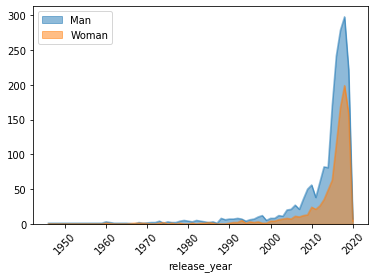

In [304]:
sexByYear_join.plot(kind='area', rot=45, stacked=False)

Как мы видим, фильмов и сериалов, в описании которых говорится о мужчинах, всё ещё значительно больше, чем тех, в описании которых преобладают женщины (в предыдущий год примерно на одну треть). Феминизм последних лет никак не поменял это соотношение - мы видим, что в предыдущие годы оно было примерно таким же. Резкий рост слов "он" и "она" в последние несколько лет, скорее всего, объясняется тем, что у Netflix больше всего именно современных фильмов и сериалов.

In [305]:
print(f'{123.444:.2f}')

123.44
